In [12]:
import pandas as pd


path = '/content/drive/My Drive/Colab Notebooks/lab05-06/egyetemek.txt'
towns = []

with open(path, 'r') as file:
    items = file.readlines()
    # filter the states
    states = list(filter(lambda x: ('[edit]' in x) and (all(c.isalpha() or c == '[' or c == ']' or c.isspace() for c in x)), items))
    # print(states)

    statesNr = len(states)
    # print(statesNr)

    tchars = '[]().,?'

    for i, state in enumerate(states):
        start = items.index(state) + 1

        if i == statesNr-1: 
            end = len(items)
        else:
            end = items.index(states[i+1])

        tu = list(filter(lambda x: all(c.isalpha() or c.isspace() or c.isnumeric() or (c in tchars) for c in x), items[start:end]))

        pairs = map(lambda x: [state, x], tu)
        towns.extend(pairs)
    
df = pd.DataFrame(towns, columns=['State', 'Town'])
df.head()

,State,Town
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


In [13]:
def clean_town(item):
  return item[:item.find('(') - 1]

df['Town'] = df.Town.apply(clean_town)
df.head()

,State,Town
0,Alabama[edit]\n,Auburn
1,Alabama[edit]\n,Florence
2,Alabama[edit]\n,Jacksonville
3,Alabama[edit]\n,Livingston
4,Alabama[edit]\n,Montevallo


In [14]:
def clean_state(item):
  return item[:item.find('[')]

df['State'] = df.State.apply(clean_state)
df.head()

,State,Town
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


In [15]:
df = df.drop_duplicates()
df.shape

(464, 2)

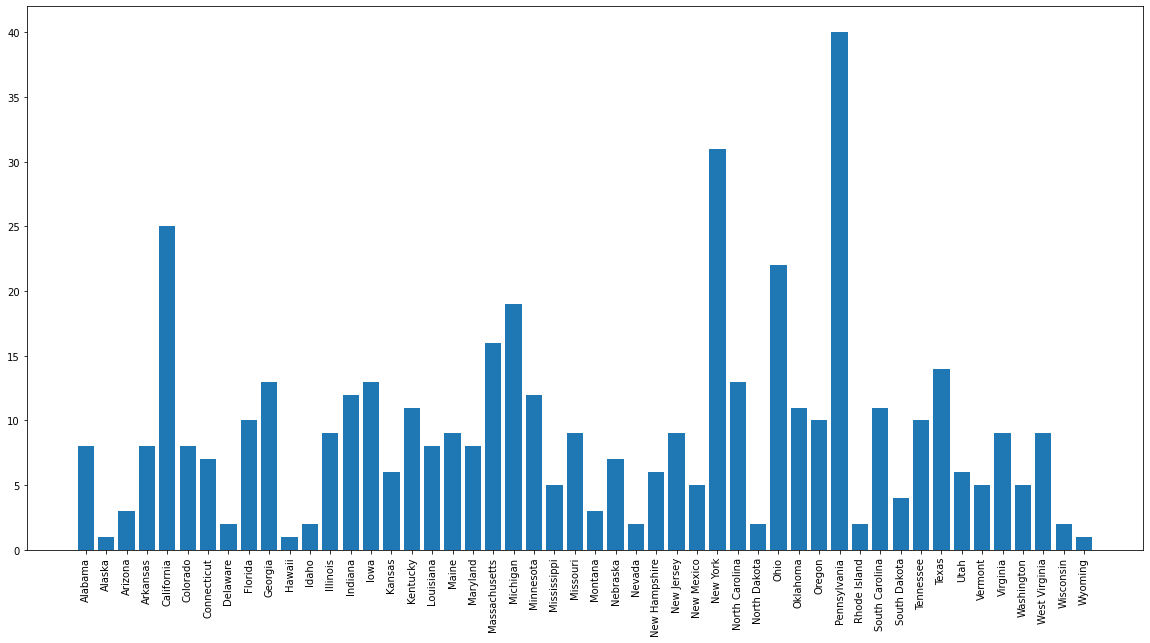

In [16]:
import matplotlib.pyplot as plt

by_state = df.groupby(['State'])
# print(by_state.count())
states = by_state.groups.keys()

plt.bar(states, by_state.Town.count())

fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(20, 10)

In [17]:
df_codes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lab05-06/statecodes.csv', names=['State', 'Code'])
df = df.merge(df_codes, on='State', how='left')
df.head()

,State,Town,Code
0,Alabama,Auburn,AL
1,Alabama,Florence,AL
2,Alabama,Jacksonville,AL
3,Alabama,Livingston,AL
4,Alabama,Montevallo,AL


In [18]:
df_population = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lab05-06/statepopulation.csv', names=['State', 'Population'])
df = df.merge(df_population, on='State', how='left')
df.Population = df.Population.str.split(',').str.join('').astype(int)
df.head()

,State,Town,Code,Population
0,Alabama,Auburn,AL,4903185
1,Alabama,Florence,AL,4903185
2,Alabama,Jacksonville,AL,4903185
3,Alabama,Livingston,AL,4903185
4,Alabama,Montevallo,AL,4903185


In [19]:
def uni_per_pers(item):
  return (len(by_state.groups[item.State]) / item.Population)


df['Uni per person'] = df.apply(uni_per_pers, axis=1)
df.head()

,State,Town,Code,Population,Uni per person
0,Alabama,Auburn,AL,4903185,0.000002
1,Alabama,Florence,AL,4903185,0.000002
2,Alabama,Jacksonville,AL,4903185,0.000002
3,Alabama,Livingston,AL,4903185,0.000002
4,Alabama,Montevallo,AL,4903185,0.000002


In [20]:
df_area = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lab05-06/statearea.csv', names=['State', 'Area'])
df = df.merge(df_area, on='State', how='left')
df.Area = df.Area.str.split(',').str.join('').astype(int)
df.head()

,State,Town,Code,Population,Uni per person,Area
0,Alabama,Auburn,AL,4903185,0.000002,135767
1,Alabama,Florence,AL,4903185,0.000002,135767
2,Alabama,Jacksonville,AL,4903185,0.000002,135767
3,Alabama,Livingston,AL,4903185,0.000002,135767
4,Alabama,Montevallo,AL,4903185,0.000002,135767


In [21]:
def uni_per_km2(item):
  return (len(by_state.groups[item.State]) / item.Area)


df['Uni per km2'] = df.apply(uni_per_km2, axis=1)
df.head()

,State,Town,Code,Population,Uni per person,Area,Uni per km2
0,Alabama,Auburn,AL,4903185,0.000002,135767,0.000059
1,Alabama,Florence,AL,4903185,0.000002,135767,0.000059
2,Alabama,Jacksonville,AL,4903185,0.000002,135767,0.000059
3,Alabama,Livingston,AL,4903185,0.000002,135767,0.000059
4,Alabama,Montevallo,AL,4903185,0.000002,135767,0.000059
